In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


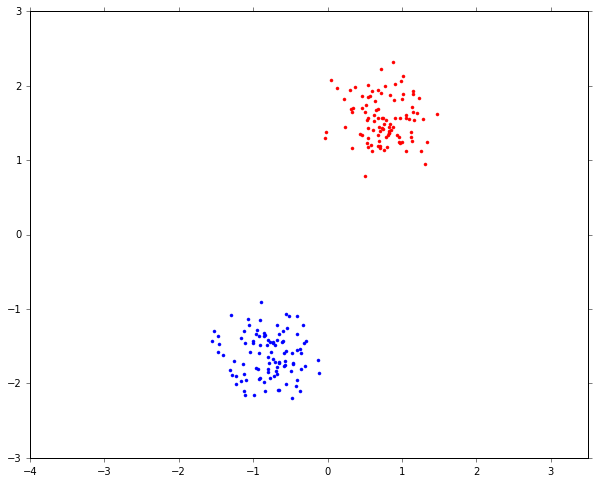

In [28]:
# Data generation
x1, y1 = np.random.multivariate_normal([-0.8, -1.6], [[0.1, 0], [0, 0.1]], 100).T
x2, y2 = np.random.multivariate_normal([0.8, 1.6], [[0.1, 0], [0, 0.1]], 100).T
x = np.append(x1, x2)
y = np.append(y1, y2)
label = np.append(np.ones(100), np.ones(100) * -1)

# Visual data
plt.plot(x1, y1, '.', color='blue')
plt.plot(x2, y2, '.', color='red')
plt.axis('equal')
plt.show()

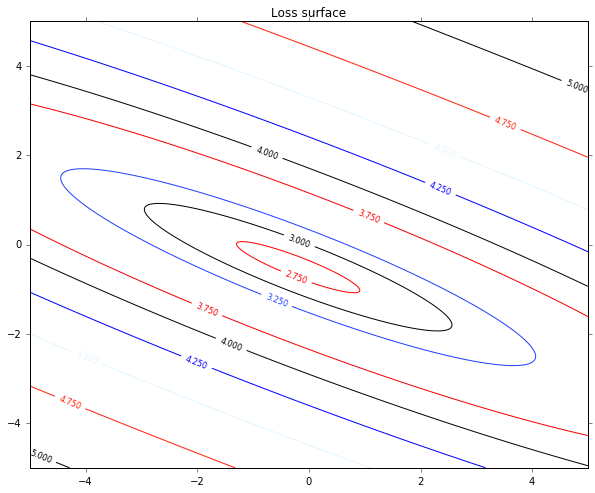

In [31]:
# Define loss
def log_LMS(x, y):
    return np.log(np.sqrt(np.sum((x-y) * (x-y), axis=1)))

# Define network
def net(w1, w2, b, x1, x2):
    return w1[:, np.newaxis].dot(x1[np.newaxis, :]) + w2[:, np.newaxis].dot(x2[np.newaxis, :]) + b

# Generate contour
w1 = np.linspace(-5, 5, 500)
w2 = np.linspace(-5, 5, 500)
W1, W2 = np.meshgrid(w1, w2)
w1 = W1.reshape(np.prod(W1.shape))
w2 = W2.reshape(np.prod(W2.shape))
Z = net(w1, w2, 1, x, y)
loss = log_LMS(Z, label)
loss = loss.reshape(W1.shape)

CS = plt.contour(W1, W2, loss, 12)
plt.clabel(CS, inline=1, fontsize=8)
plt.title('Loss surface')
plt.show()